In [6]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)
from scipy.spatial import cKDTree
from math import *
np.random.seed(123)
import urllib.request
import urllib, os

In [7]:
import pandas as pd
import xarray as xr
import math
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta

In [8]:
import numpy as np
import xarray as xr
import xesmf as xe

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [11]:
ds = xr.open_dataset(r'/home/shubham/ugp/cleaned/zos_AVISO.nc')

In [98]:
ds

<xarray.Dataset>
Dimensions:    (time: 219, bnds: 2, lat: 180, lon: 360)
Coordinates:
  * time       (time) datetime64[ns] 1992-10-16T12:00:00 ... 2010-12-16T12:00:00
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1992-10-01 1992-11-01 ... 2011-01-01
    lat_bnds   (lat, bnds) float64 -90.0 -89.0 -89.0 -88.0 ... 89.0 89.0 90.0
    lon_bnds   (lon, bnds) float64 0.0 1.0 1.0 2.0 ... 358.0 359.0 359.0 360.0
    zos        (time, lat, lon) float32 ...
Attributes: (12/28)
    institution:         Centre National d'Etudes Spatiales
    institute_id:        CNES
    experiment_id:       obs
    source:              SSALTO/DUACS
    model_id:            Obs-AVISO
    contact:             AVISO User Service, aviso@oceanobs.com
    ...                  ...
    Conventions:         CF-1.4
    project_id:          obs4MIPs
    table_id:            Table Omon_obs (31 January 2011) 3852a2b3aff8bddd40f...
    title:               Obs-AVISO model output prepared for obs4MIPs NASA-JP...
    modeling_realm:      ocean
    cmor_version:        2.5.3

In [13]:
per = pd.DatetimeIndex(ds.time).to_period("M")
per

PeriodIndex(['1992-10', '1992-11', '1992-12', '1993-01', '1993-02', '1993-03',
             '1993-04', '1993-05', '1993-06', '1993-07',
             ...
             '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08',
             '2010-09', '2010-10', '2010-11', '2010-12'],
            dtype='period[M]', length=219)

In [14]:
(per)

PeriodIndex(['1992-10', '1992-11', '1992-12', '1993-01', '1993-02', '1993-03',
             '1993-04', '1993-05', '1993-06', '1993-07',
             ...
             '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08',
             '2010-09', '2010-10', '2010-11', '2010-12'],
            dtype='period[M]', length=219)

In [15]:
l = []
for i in range(13):
    l.append(ds.zos[per.month == i])
    

In [16]:
l[1]

<xarray.DataArray 'zos' (time: 18, lat: 180, lon: 360)>
[1166400 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1993-01-16T12:00:00 ... 2010-01-16T12:00:00
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Attributes:
    standard_name:     sea_surface_height_above_geoid
    long_name:         Sea Surface Height Above Geoid
    units:             m
    original_name:     maps_of_absolute_dynamic_topography
    history:           2011-02-11, 12:02:38, AVISO, Aviso2Cmor 2009-01-01 200...
    original_units:    cm
    cell_methods:      time: mean
    cell_measures:     area: areacello
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [18]:
f = []
for i in range(1, 13):
    k = []
    for j in range(1, len(l[i])):
        k.append(l[i][j][:][:].mean())
    f.append(k)

In [19]:
for i in range(0, len(f)):
    print(np.array(f[i]))

[0.33504155 0.285981   0.28830013 0.28724462 0.2961268  0.3001715
 0.30254346 0.30223066 0.31096163 0.31629992 0.31476885 0.31490996
 0.31802174 0.31819987 0.32456398 0.33023095 0.33807707]
[0.32988662 0.2812895  0.28317162 0.2844059  0.29356042 0.29322985
 0.29731846 0.299628   0.30623555 0.31059048 0.30798373 0.31213796
 0.31478354 0.31482476 0.32016355 0.3237471  0.33515376]
[0.3292279  0.27667937 0.28102383 0.2817539  0.29125607 0.2910458
 0.29192942 0.2951988  0.30368823 0.3107259  0.310717   0.3076826
 0.3073545  0.31256562 0.31714305 0.32262745 0.33608016]
[0.2950316  0.2812179  0.2885223  0.28822896 0.29993734 0.29840562
 0.29381996 0.30897856 0.30695185 0.31550917 0.315635   0.312238
 0.30730104 0.31828848 0.33351454 0.33203122 0.33584726]
[0.30394623 0.30090547 0.31456247 0.30673414 0.3153143  0.31520596
 0.31881815 0.32089183 0.32252467 0.33286962 0.3291416  0.32882866
 0.3248946  0.32994738 0.3487857  0.3485319  0.35041475]
[0.31932485 0.32387638 0.3359735  0.33337924 0.332

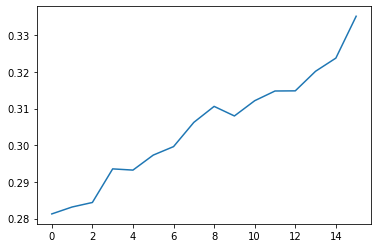

In [23]:
A = np.array(f[1])
a = np.interp(np.arange(len(A)), 
          np.arange(len(A))[np.isnan(A) == False], 
          A[np.isnan(A) == False])
plt.plot(a[1:])

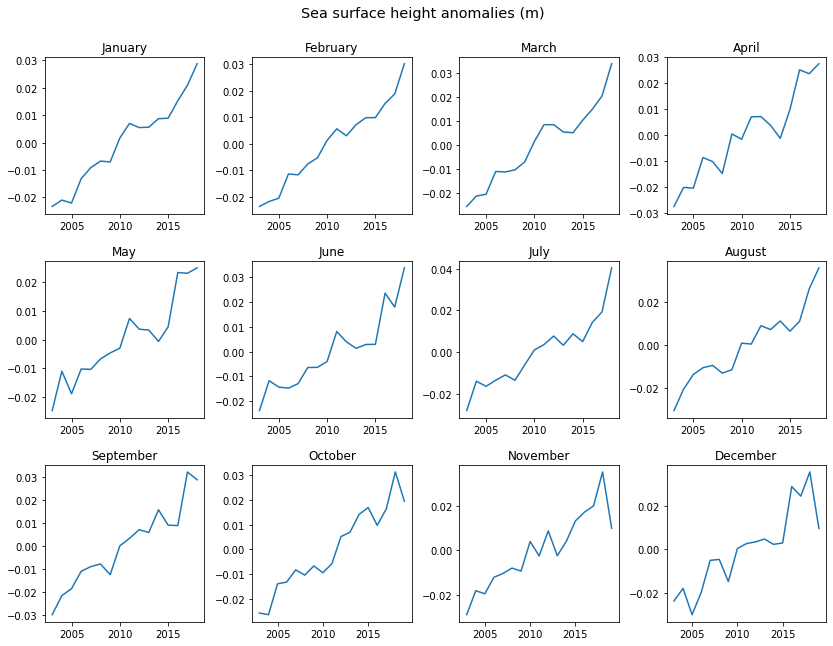

<Figure size 432x288 with 0 Axes>

In [96]:
import datetime
fig = plt.figure(figsize = (14, 10))
fig.suptitle("Sea surface height anomalies (m)", fontsize = 'x-large')
for i in range(1, 13):
    plt.subplot(3, 4, i)
    plt.title(datetime.date(1900, i , 1).strftime('%B'))
    A = np.array(f[i - 1])
    a = np.interp(np.arange(len(A)), 
          np.arange(len(A))[np.isnan(A) == False], 
          A[np.isnan(A) == False])
    mea = a[1:].mean()
    plt.plot(range(2003,2003 + len(a[1:])), a[1:]-mea)
#fig.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.3)
fig.subplots_adjust(top=0.91)
plt.show()
plt.savefig('ssh.png')

In [36]:
np.array(range(2002, 2002 + len(a) - 1))

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018])